In [162]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed
from numpy.random import randint

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers

In [137]:
data = np.load("images.npy")

In [138]:
data.shape

(4750, 128, 128, 3)

In [139]:
df_labels = pd.read_csv("labels.csv")
df_labels.info()
df_labels.shape
type(df_labels)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


pandas.core.frame.DataFrame

In [140]:
data_set = []

for i in range(len(data)):
    label = df_labels.iloc[i][0]
    img = data[i]
    data_set.append([img, label])

df_data_set = pd.DataFrame(data_set, columns= ['img', 'labels'])
df_data_set.tail(100)

,img,labels
4650,"[[[106, 116, 128], [106, 116, 127], [102, 112,...",Loose Silky-bent
4651,"[[[66, 85, 100], [65, 86, 100], [66, 88, 102],...",Loose Silky-bent
4652,"[[[24, 38, 71], [22, 33, 69], [19, 31, 65], [2...",Loose Silky-bent
4653,"[[[32, 32, 47], [33, 42, 51], [60, 78, 86], [7...",Loose Silky-bent
4654,"[[[108, 122, 135], [112, 128, 142], [108, 127,...",Loose Silky-bent
...,...,...
4745,"[[[79, 94, 104], [77, 94, 105], [74, 94, 104],...",Loose Silky-bent
4746,"[[[55, 69, 85], [54, 67, 82], [50, 62, 78], [4...",Loose Silky-bent
4747,"[[[163, 165, 170], [55, 56, 67], [58, 56, 60],...",Loose Silky-bent
4748,"[[[116, 142, 153], [107, 137, 152], [110, 141,...",Loose Silky-bent


In [141]:
df_data_set['labels'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

Loose Silky-bent             13.8%
Common Chickweed             12.9%
Scentless Mayweed            10.9%
Small-flowered Cranesbill    10.4%
Fat Hen                      10.0%
Charlock                      8.2%
Sugar beet                    8.1%
Cleavers                      6.0%
Black-grass                   5.5%
Shepherds Purse               4.9%
Maize                         4.7%
Common wheat                  4.7%
Name: labels, dtype: object

In [142]:
df_data_set['labels'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: labels, dtype: int64

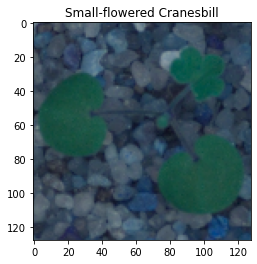

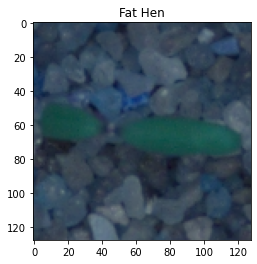

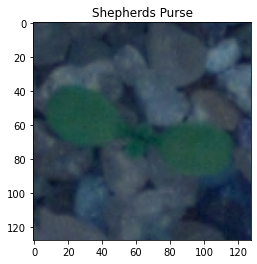

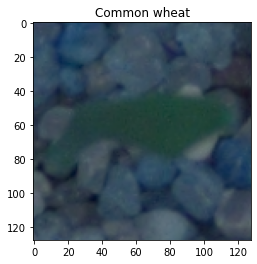

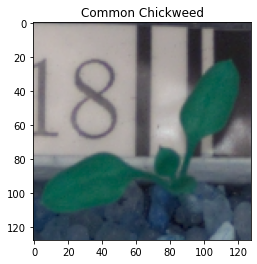

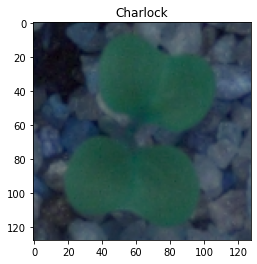

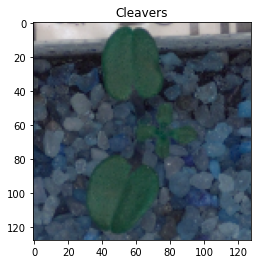

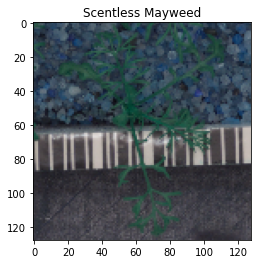

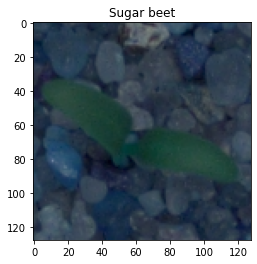

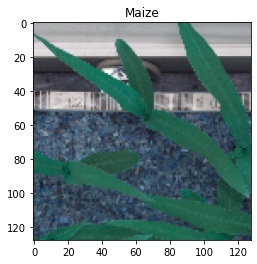

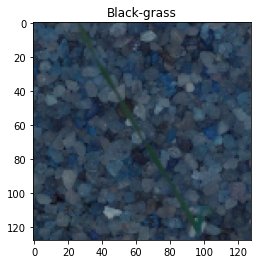

In [143]:
def show_image(img, label):
   # print(img)
    plt.imshow(img);
    plt.title(label)
    plt.show()

for i in range(len(df_data_set)):
    try:
        if df_data_set.iloc[i]['labels'] != df_data_set.iloc[i+1]['labels']:
            show_image(df_data_set.iloc[i]['img'], df_data_set.iloc[i]['labels'])
        else:
            continue
    except:
        break
        

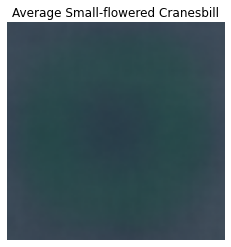

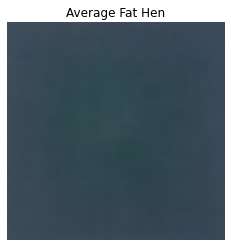

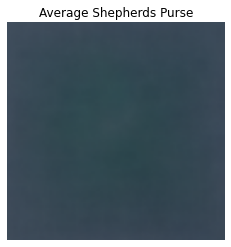

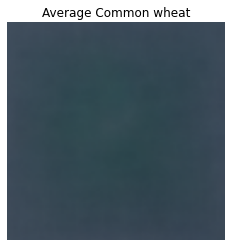

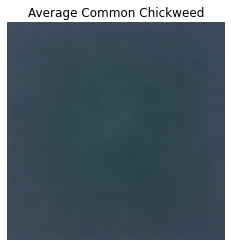

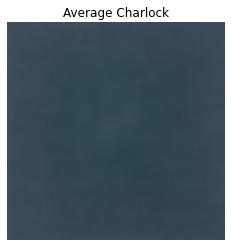

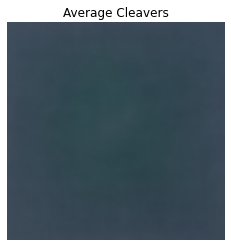

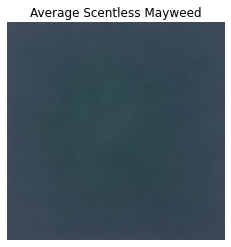

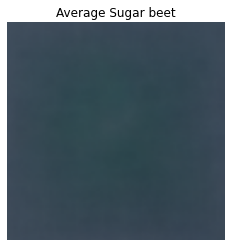

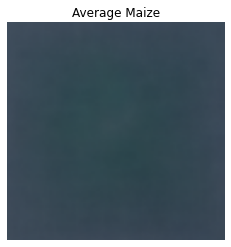

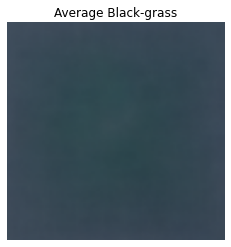

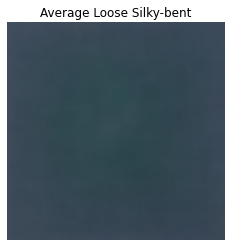

In [145]:
# Finding mean image of each class
classes = []
class_0 = []
class_1 = []
class_2 = []
class_3 = []
class_4 = []
class_5 = []
class_6 = []
class_7 = []
class_8 = []
class_9 = []
class_10 = []
class_11 = []

for i in range(len((df_data_set['labels'].unique()))):
    classes.append((df_data_set['labels'].unique())[i])



for i in range(len(df_data_set)):
    
    if df_data_set.iloc[i]['labels'] == classes[0]:
        class_0.append(df_data_set.iloc[i]['img'])
    
    if df_data_set.iloc[i]['labels'] == classes[1]:
        class_1.append(df_data_set.iloc[i]['img'])
   
    if df_data_set.iloc[i]['labels'] == classes[2]:
        class_2.append(df_data_set.iloc[i]['img'])
    
    if df_data_set.iloc[i]['labels'] == classes[3]:
        class_3.append(df_data_set.iloc[i]['img'])
    
    if df_data_set.iloc[i]['labels'] == classes[4]:
        class_4.append(df_data_set.iloc[i]['img'])
    
    if df_data_set.iloc[i]['labels'] == classes[5]:
        class_5.append(df_data_set.iloc[i]['img'])

    if df_data_set.iloc[i]['labels'] == classes[6]:
        class_6.append(df_data_set.iloc[i]['img'])
    
    if df_data_set.iloc[i]['labels'] == classes[7]:
        class_7.append(df_data_set.iloc[i]['img'])
    
    if df_data_set.iloc[i]['labels'] == classes[8]:
        class_8.append(df_data_set.iloc[i]['img'])
    
    if df_data_set.iloc[i]['labels'] == classes[9]:
        class_9.append(df_data_set.iloc[i]['img'])
    
    if df_data_set.iloc[i]['labels'] == classes[10]:
        class_10.append(df_data_set.iloc[i]['img'])
   
    if df_data_set.iloc[i]['labels'] == classes[11]:
        class_11.append(df_data_set.iloc[i]['img'])

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


        
def find_mean_img(images, class_title):
    mean_img = np.mean(images, axis=0).astype(int)
#    mean_img = rgb2gray(mean_img).astype(int)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='gray')
    plt.title(f'Average {class_title}')
    plt.axis('off')
    plt.show()
    return mean_img

class_0_mean = find_mean_img(np.array(class_0), classes[0])
class_1_mean = find_mean_img(np.array(class_1), classes[1])
class_2_mean = find_mean_img(np.array(class_1), classes[2])
class_3_mean = find_mean_img(np.array(class_1), classes[3])
class_4_mean = find_mean_img(np.array(class_1), classes[4])
class_5_mean = find_mean_img(np.array(class_1), classes[5])
class_6_mean = find_mean_img(np.array(class_1), classes[6])
class_7_mean = find_mean_img(np.array(class_1), classes[7])
class_8_mean = find_mean_img(np.array(class_1), classes[8])
class_9_mean = find_mean_img(np.array(class_1), classes[9])
class_10_mean = find_mean_img(np.array(class_1), classes[10])
class_11_mean = find_mean_img(np.array(class_1), classes[11])


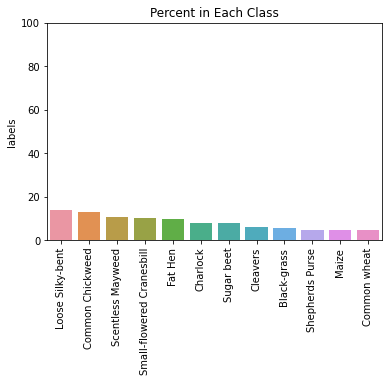

In [147]:
#cat = (df_data_set['labels'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%').to_frame()
# cat = (df_data_set['labels'].value_counts()).to_frame()
# cat.reset_index(level=0, inplace=True)
# cat.rename(columns={"index": "class", "labels": "percent"}, errors="raise", inplace = True)
# cat

graph = sns.barplot(df_data_set['labels'].value_counts().index,
                    (df_data_set['labels'].value_counts()/len(df_data_set)*100)).set_title("Percent in Each Class")
plt.ylim(0,100);
plt.xticks(rotation = 90)
plt.show()


#### The above plot shows that this dataset is mostly balanced in each class ranging from 4.7% to 13.8%

#### Let's visualize MRI images randomly from each of the three classes. The Image matrix is plotted and each row represents three single channel images corresponding to one class. We have read single channel images in order to reduce complexity.

Small-flowered Cranesbill


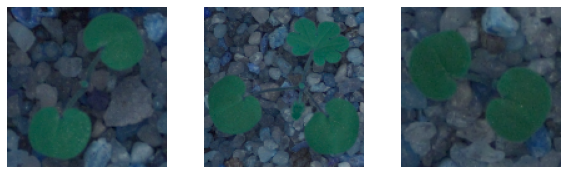

Fat Hen


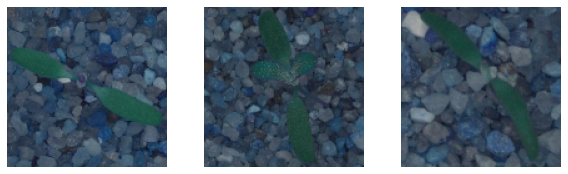

Shepherds Purse


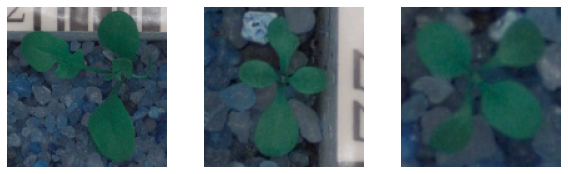

Common wheat


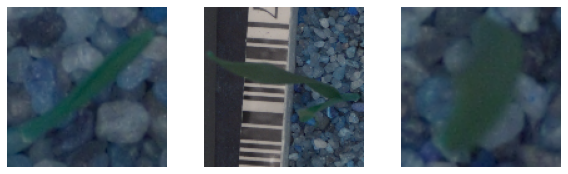

Common Chickweed


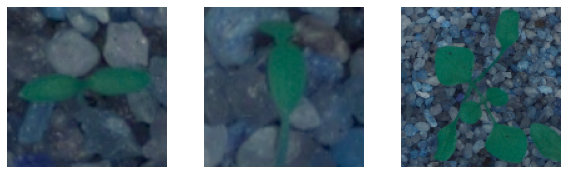

Charlock


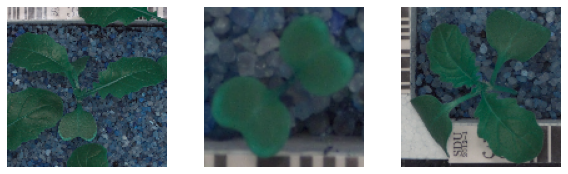

Cleavers


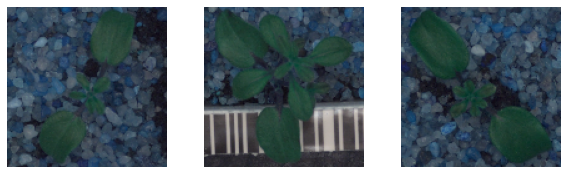

Scentless Mayweed


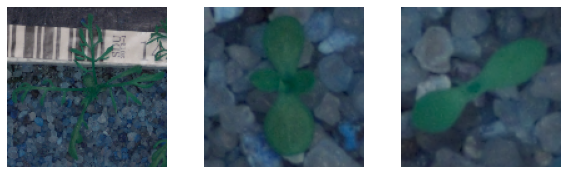

Sugar beet


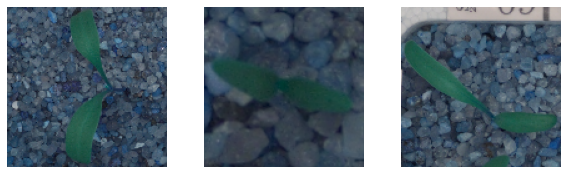

Maize


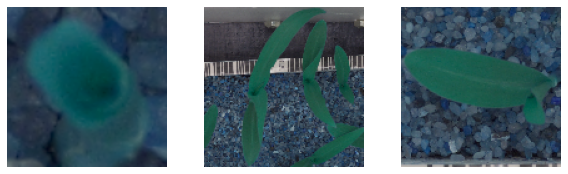

Black-grass


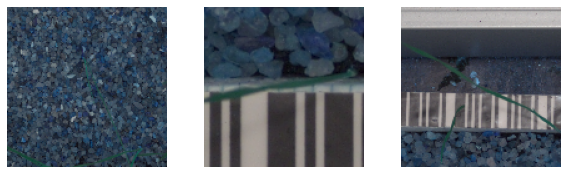

Loose Silky-bent


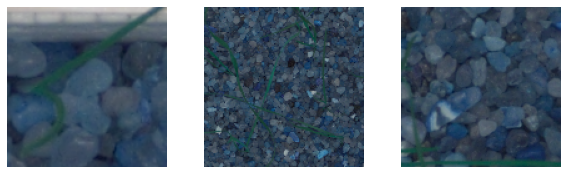

In [148]:
#class_0_rand = np.random.choice(np.array(class_0),3, replace = False)
seed(1)
values = randint(0, 10, 3)

from keras.preprocessing import image

def print_img(cat, title):
    print(title)
    fig = plt.figure(figsize = (10,10))
    count = 1
    for i in values:
        plt.subplot(3, 3, count)
        plt.imshow(cat[i], cmap='gray')
        plt.axis('off')
        count += 1
    plt.show()

print_img(class_0, classes[0])
print_img(class_1, classes[1])
print_img(class_2, classes[2])
print_img(class_3, classes[3])
print_img(class_4, classes[4])
print_img(class_5, classes[5])
print_img(class_6, classes[6])
print_img(class_7, classes[7])
print_img(class_8, classes[8])
print_img(class_9, classes[9])
print_img(class_10, classes[10])
print_img(class_11, classes[11])

# Data PreProcessing

### Remove unwanted noise from the images using Guassian Blurring

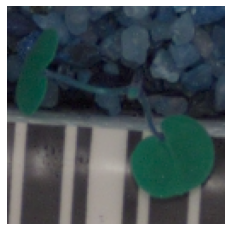

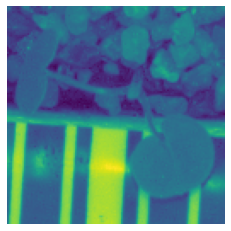

In [149]:
import cv2
plt.imshow(class_0[10])
plt.axis('off')
plt.show()
image = class_0[10]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.reshape(128,128,1)
plt.imshow(image)
plt.axis('off')
plt.show()

In [150]:
df_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     4750 non-null   object
 1   labels  4750 non-null   object
dtypes: object(2)
memory usage: 74.3+ KB


In [151]:
# Creating X with Target Variable and creating y with target variable.
df_data_set_copy = df_data_set
X = df_data_set_copy.drop("labels" , axis=1)
y = df_data_set_copy.pop("labels")

In [152]:
# Splitting Train and Test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [153]:
#checking class balance in both test and train
print(y_train.value_counts()/len(y_train)*100)
print(y_test.value_counts()/len(y_test)*100)

Loose Silky-bent             13.984962
Common Chickweed             12.932331
Scentless Mayweed            11.007519
Small-flowered Cranesbill    10.255639
Fat Hen                      10.015038
Charlock                      8.571429
Sugar beet                    7.729323
Cleavers                      6.225564
Black-grass                   5.082707
Shepherds Purse               4.812030
Common wheat                  4.751880
Maize                         4.631579
Name: labels, dtype: float64
Loose Silky-bent             13.263158
Common Chickweed             12.701754
Small-flowered Cranesbill    10.877193
Scentless Mayweed            10.526316
Fat Hen                       9.964912
Sugar beet                    8.982456
Charlock                      7.368421
Black-grass                   6.596491
Cleavers                      5.614035
Shepherds Purse               4.982456
Maize                         4.701754
Common wheat                  4.421053
Name: labels, dtype: float64


#### Observation - Class are balanced between training and test data

In [154]:
classes
y_test = y_test.to_frame()
y_train = y_train.to_frame()

In [155]:
classes

['Small-flowered Cranesbill',
 'Fat Hen',
 'Shepherds Purse',
 'Common wheat',
 'Common Chickweed',
 'Charlock',
 'Cleavers',
 'Scentless Mayweed',
 'Sugar beet',
 'Maize',
 'Black-grass',
 'Loose Silky-bent']

In [156]:
replaceStruct = {
                "labels": {"Small-flowered Cranesbill": 0, "Fat Hen": 1,
                            "Shepherds Purse":2, "Common wheat":3,
                           "Common Chickweed":4, "Charlock":5,
                           "Cleavers":6, "Scentless Mayweed":7,
                           "Sugar beet":8, "Maize":9,
                           "Black-grass":10, "Loose Silky-bent":11,
                          }
                }
y_test=y_test.replace(replaceStruct)
y_train=y_train.replace(replaceStruct)

In [160]:
#Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def create_model(): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(150,150)),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(4, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [163]:
model_ann=create_model()
model_ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 22500)             0         
_________________________________________________________________
dense (Dense)                (None, 500)               11250500  
_________________________________________________________________
dense_1 (Dense)              (None, 700)               350700    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2804      
Total params: 11,604,004
Trainable params: 11,604,004
Non-trainable params: 0
_________________________________________________________________


In [175]:
X_train = X_train.to_numpy()


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [177]:
X_train = X_train / 255.0
X_train

array([[array([[[0.0011534 , 0.00135333, 0.00147636],
        [0.00109189, 0.00130719, 0.00147636],
        [0.00089196, 0.00106113, 0.00124567],
        ...,
        [0.0007228 , 0.00066128, 0.00079969],
        [0.0007228 , 0.00067666, 0.00079969],
        [0.00056901, 0.00059977, 0.00069204]],

       [[0.00075356, 0.00087659, 0.00106113],
        [0.00104575, 0.0012303 , 0.00139946],
        [0.0009381 , 0.00109189, 0.00126105],
        ...,
        [0.00064591, 0.00059977, 0.00073818],
        [0.00066128, 0.00067666, 0.00079969],
        [0.00059977, 0.00058439, 0.00075356]],

       [[0.00061515, 0.0007228 , 0.00092272],
        [0.00133795, 0.00153787, 0.00167628],
        [0.00126105, 0.00153787, 0.00173779],
        ...,
        [0.00067666, 0.00064591, 0.00083045],
        [0.00069204, 0.00069204, 0.00081507],
        [0.00069204, 0.00069204, 0.00083045]],

       ...,

       [[0.0011534 , 0.00173779, 0.00219915],
        [0.00118416, 0.00178393, 0.00233756],
        [0.000

In [172]:
y_train = y_train.to_numpy()

In [179]:
#Train the model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model_ann.fit(X_train, 
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=200, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).